# 1 Define the Payload

In [21]:
# Getting the data
import requests
import json
import pandas as pd
#import matplotlib.pyplot as plt

# Define the Payload that  will be sent to the API endpoint - In this case we will request data for all countries
payload = {"code": "ALL"}  # or {'country': 'Germany'}

# 2 Call the REST API Endpoint

In [22]:
# To retrieve data for all countries use {'code': 'ALL'}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
response

<Response [200]>

# 3 Convert the Data to a Dataframe

In [23]:
# Convert to data frame
df = pd.DataFrame.from_dict(json.loads(response.text))
df.head()

date day month  year  cases  deaths      country code  population  \
0  2019-12-31  31    12  2019      0       0  Afghanistan   AF  38041757.0   
1  2020-01-01  01    01  2020      0       0  Afghanistan   AF  38041757.0   
2  2020-01-02  02    01  2020      0       0  Afghanistan   AF  38041757.0   
3  2020-01-03  03    01  2020      0       0  Afghanistan   AF  38041757.0   
4  2020-01-04  04    01  2020      0       0  Afghanistan   AF  38041757.0   

  continent  cases_cum  deaths_cum  
0      Asia          0           0  
1      Asia          0           0  
2      Asia          0           0  
3      Asia          0           0  
4      Asia          0           0

# 4 Plot the Data

In [248]:
# Convert date column to date format
df.loc[:, "date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# Filter specific countries - The following countries will be included# 
list_of_countries = ["Germany", "Switzerland", "France", "Spain", "Canada"]
dff = df[df["country"].isin(list_of_countries)]

# Filter the data to a specific timeframe
date_start = "2020-01-15"
date_today = df[df["date"] == df["date"].max()]["date"].iloc[0]
dff = dff[dff["date"] > date_start]

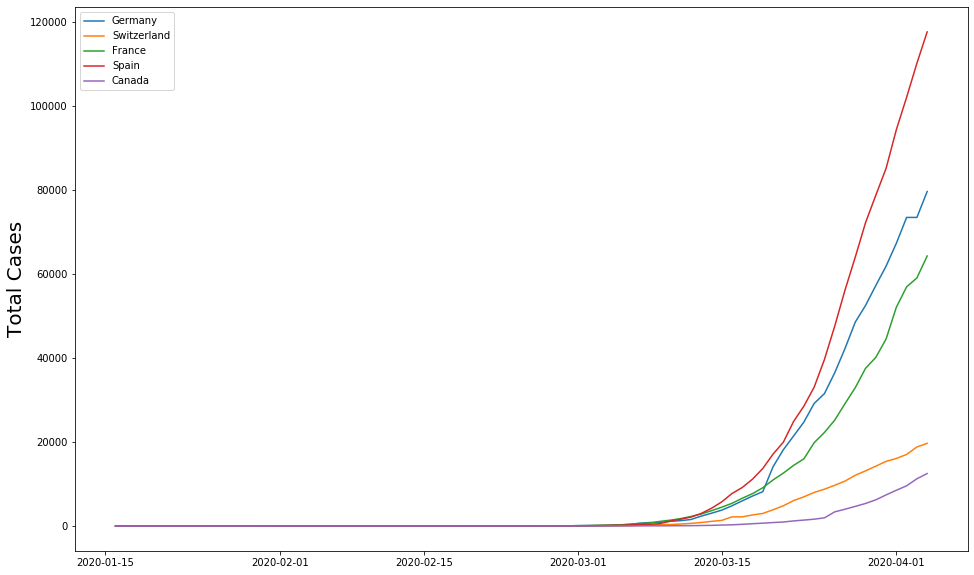

In [251]:
# Print the plot
x = dff[dff["country"] == list_of_countries[1]]["date"]
fig, ax1 = plt.subplots(figsize=(16, 10))
plt.ylabel("Total Cases", fontsize=20, color="black")
for countryname in list_of_countries:
    countrydata = dff[dff["country"] == countryname]["cases_cum"]
    plt.plot(x, countrydata, label=countryname)

plt.legend(list_of_countries, loc="upper left")
plt.show()